In [ ]:
#Importing Libraries
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg
import scipy.linalg

In [ ]:
#Defining our boundary conditions and problem parameters
a = 0.
b = 1.
mu = 1.
beta = 10
y_a = 0
y_b = 1

In [ ]:
#Defining a function of zeros
def f(x):
    return 0+0*x

In [ ]:
#Defining our exact solution
def y(x,mu,beta):
    return (np.exp(beta*x/mu)-1)/(np.exp(beta/mu)-1)

In [ ]:
#Defining our matrix-vector product
def solver_centred(x,f,mu,beta,y_a,y_b,dx,n):
  #Finite Discretization
  n =  int((b-a)/dx)
  x = np.linspace(a,b,n+1)
  #Defining b vector
  b_vector = f(x)
  #Defining our matrix
  Ad =-(mu/dx**2)*sp.diags([1., -2., 1.], [-1, 0, 1], shape=[n+1, n+1], format = 'csr')
  Ac =beta/(2*dx)*sp.diags([-1., 0., 1.], [-1, 0, 1], shape=[n+1, n+1], format = 'csr')
  A = Ad + Ac
  #Modifying our tridiagonal matrix to include boundary conditions
  A[0,1] = 0
  A[0, 1] = 0.
  A[-1, -2] = 0.
  A[0, 0] = 1./dx**2
  A[-1, -1] = 1./dx**2
  #Modifying our b vector to include boundary conditions
  b_vector[0] = y_a/dx**2
  b_vector[-1] = y_b/dx**2
  #solving our linear system
  u = sp.linalg.spsolve(A,b_vector)
  return u

In [ ]:
#Grabbing our solutions (exact and numerical)
#u_ex = y(x,mu,beta)
#u_num = solver_centred(x,f,mu,beta,y_a,y_b,dx,n)

In [ ]:
def errorfunc(dx):
  #Finite Discretization
  n =  int((b-a)/dx)
  x = np.linspace(a,b,n+1)
  error_array = y(x,mu,beta) - solver_centred(x,f,mu,beta,y_a,y_b,dx,n)
  max_error = np.max(np.abs(error_array))
  return max_error

In [ ]:
dx = [0.1,0.05,0.025,0.0125,0.00625]

In [ ]:
for i in range(len(dx)):
  print(errorfunc(dx[i]))

0.034528698555920334
0.0078741419090807
0.0019277417983957212
0.0004794716727190562
0.00011971521869902357


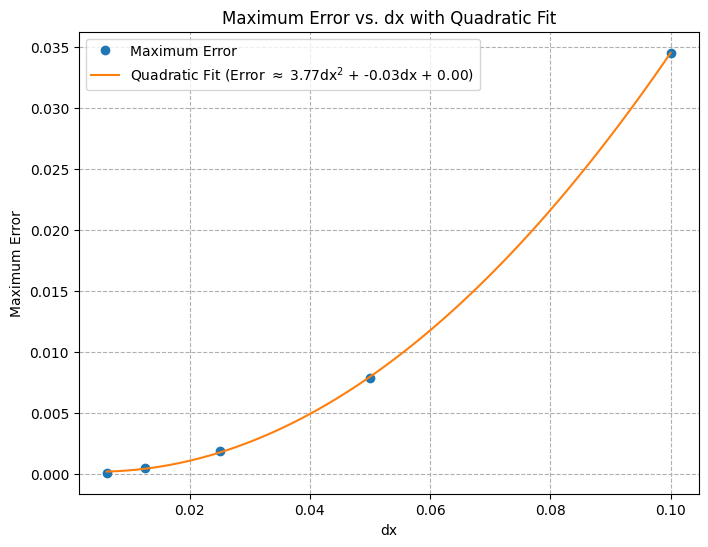

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Recalculate errors if not already available
errors = [errorfunc(d) for d in dx]

# Perform a quadratic fit (degree 2 polynomial)
# We fit errors as a function of dx
coeffs = np.polyfit(dx, errors, 2)
quadratic_fit = np.poly1d(coeffs)

# Generate points for the fitted curve
dx_fit = np.linspace(min(dx), max(dx), 100)
errors_fit = quadratic_fit(dx_fit)

# Plotting the results with the quadratic fit
plt.figure(figsize=(8, 6))
plt.plot(dx, errors, 'o', label='Maximum Error')
plt.plot(dx_fit, errors_fit, '-', label=f'Quadratic Fit (Error $\\approx$ {coeffs[0]:.2f}dx$^2$ + {coeffs[1]:.2f}dx + {coeffs[2]:.2f})')
plt.xlabel('dx')
plt.ylabel('Maximum Error')
plt.title('Maximum Error vs. dx with Quadratic Fit')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()